## KNN algorithm to classify breast cancer data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import neighbors, preprocessing, svm

The data was obtained from UCI MACHINE LEARNING (/kaggle/input/breast-cancer-wisconsin-data/data.csv), and it is already cleaned. First we will select the features to use.

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df.drop(columns = ['Unnamed: 32', 'id'], inplace = True)
df.replace('M', 1, inplace = True)
df.replace('B', 0, inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Furtermore, building the training and test datasets,

In [3]:
X = np.array(df.drop(['diagnosis'],1))
X = preprocessing.scale(X)

y = np.array(df['diagnosis'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


A little classification can be seen by pairplotting the features,

In [4]:
df_train = pd.DataFrame(X_train, columns = df.drop(columns = ['diagnosis']).columns)
df_train['diagnosis'] = pd.Series(data = y_train)

df_test = pd.DataFrame(X_test, columns = df.drop(columns = ['diagnosis']).columns)
df_test['diagnosis'] = pd.Series(data = y_test)

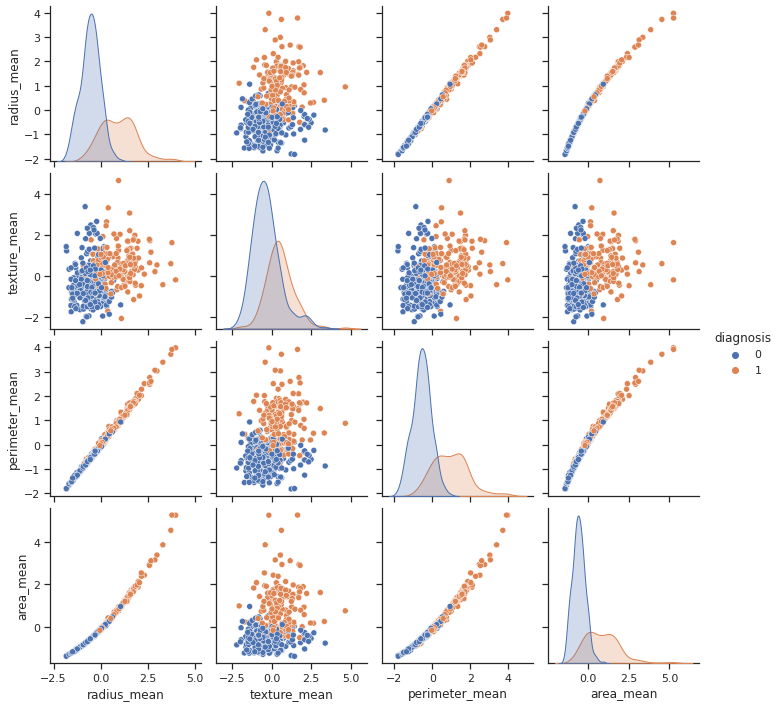

In [5]:
sns.set_theme(style="ticks")
g = sns.pairplot(df_train[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']], hue = 'diagnosis')

Now training the model using KNeighborsClassifier with 9 nearest neighbors, and SVM Classifier

In [6]:
# clf = neighbors.KNeighborsClassifier(n_neighbors = 9)
clf = svm.SVC(random_state = 42)

clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print('Accuracy: ', accuracy)

Accuracy:  0.9736842105263158


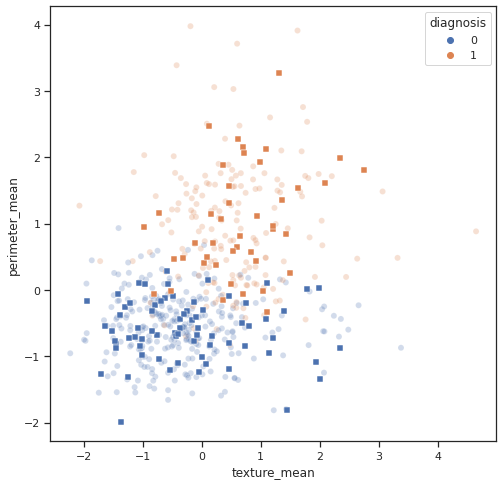

In [7]:
fig, ax = plt.subplots(figsize=[8,8])
ax = sns.scatterplot(x = 'texture_mean', y = 'perimeter_mean', data = df_train, hue = 'diagnosis', alpha = 0.25, legend = None)
ax = sns.scatterplot(x = 'texture_mean', y = 'perimeter_mean', data = df_test, hue = 'diagnosis', alpha = 1, marker = 's')